# Trials

This notebook provides a tutorial on how to use the `Trials` classes in Elephant for handling neuroscience data structured in repeated trials. The `Trials` classes provide a unified API to access and manipulate trial data, regardless of whether the data is stored in `neo.Block` or as lists of lists.

## Introduction

In neuroscience, trials are repeated experimental runs that help in estimating various quantities from the data. The Trials class in Elephant provides a structured way to handle and access trial data, irrespective of how it is stored. This overview will cover the basic structure and functionalities of the Trials class and its subclasses.

## Imports and Setup

First, we need to import the necessary modules and set up some example data.

In [1]:
import numpy as np
import neo
from neo.core import Block, Segment, SpikeTrain, AnalogSignal
from quantities import ms, mV, Hz
from elephant.trials import TrialsFromBlock, TrialsFromLists
from elephant.datasets import download_datasets
import matplotlib.pyplot as plt


# Helper function to create example spike trains and analog signals
def create_example_data():
    spike_times = [np.array([10, 20, 30]) * ms, np.array([15, 25, 35]) * ms]
    spike_trains = [SpikeTrain(spike_time, t_start=0*ms, t_stop=40*ms) for spike_time in spike_times]
    analog_signals = [AnalogSignal(np.random.randn(1000), sampling_rate=1000 * Hz, units=mV) for _ in range(2)]
    return spike_trains, analog_signals


# Download example data

The following code downloads a dataset from the Elephant tutorial repository and loads it into a `neo.Block` object using the Neo NixIO, see [Neo documentation](https://neo.readthedocs.io/en/latest/share_data.html#nix).
The structure of the dataset is as follows:
- Each `neo.Segment` in the `neo.Block` represents a trial.
- each `neo.Segment` contains neo.SpikeTrains, which contain the spiking activity of the neurons.

In [2]:
# Download data
repo_path='tutorials/tutorial_unitary_event_analysis/data/dataset-1.nix'
filepath=download_datasets(repo_path)

# Load data
io = neo.io.NixIO(f"{filepath}",'ro')
block = io.read_block()

/home/kern/git/inm-6/elephant/elephant/datasets.py:154: UserWarning: No corresponding version of elephant-data found.
Elephant version: 1.2.0b1. Data URL:https://gin.g-node.org/NeuralEnsemble/elephant-data/raw/v1.2.0b1/README.md, error: HTTP Error 404: Not Found.
Using elephant-data latest instead (This is expected for elephant development versions).
  warnings.warn(f"No corresponding version of elephant-data found.\n"


## 1. base `Trials` class:

The `Trials` class is an abstract base class that defines the common interface for handling trial data. It includes methods for accessing individual trials, getting the number of trials, and retrieving spike trains or analog signals from specific trials. \
Here we use the `TrialsFromBlock` class to access and manipulate the trial data,
this subclass handles trial data stored in a `neo.Block`, where each `neo.Segment` within the block represents a trial.


Use the methods provided by the `Trials` class to access and manipulate the trial data:

In [3]:
# Create a TrialsFromBlock instance
trials_from_block = TrialsFromBlock(block)

# Access trial data
print(f'Number of trials: {trials_from_block.n_trials}')
print(f'Number of spike trains in each trial: {trials_from_block.n_spiketrains_trial_by_trial}')
print(f'Number of analog signals in each trial: {trials_from_block.n_analogsignals_trial_by_trial}')

# Get a specific trial as a Segment
trial_1_segment = trials_from_block.get_trial_as_segment(1)
print(f'Trial 1 Segment: {trial_1_segment}')

# Get all spike trains from trial
all_spike_trains_trial_2 = trials_from_block.get_spiketrains_from_trial_as_list(trial_id=1)
print(f'All spike trains from trial 2: {all_spike_trains_trial_2}')

Number of trials: 36
Number of spike trains in each trial: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Number of analog signals in each trial: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Trial 1 Segment: <neo.core.segment.Segment object at 0x7b25536ad040>
All spike trains from trial 2: [<SpikeTrain(array([   4.,   45.,   85.,  123.,  156.,  185.,  226.,  274.,  296.,
        323.,  348.,  371.,  404.,  471.,  499.,  530.,  560.,  581.,
        601.,  626.,  654.,  700.,  727.,  762.,  792.,  805.,  827.,
        828.,  847.,  869.,  899.,  920.,  933.,  972., 1001., 1023.,
       1031., 1051., 1086., 1152., 1172., 1176., 1199., 1223., 1245.,
       1273., 1304., 1379., 1400., 1401., 1417., 1424., 1444., 1449.,
       1483., 1546., 1564., 1583., 1588., 1615., 1629., 1660., 1683.,
       1706., 1732., 1774., 1816., 1834., 1849., 1884., 1905., 2030.]) * ms, [0.

# 2. Use `Trials` to create a plot
The `Trials` object enables handling of experimental data in a structured and consistent way. This abstraction allows for easier implementation of various tasks. Here we will use the `Trials` object to plot the spiking activity of the neurons for a few trials.

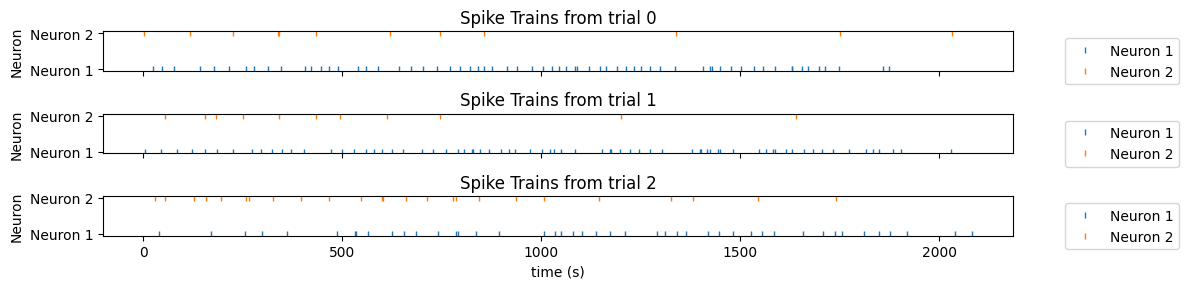

In [16]:
# Plot all spiketrains belonging to specific trials
trials = (3,4,5)
n_trials = len(trials)

# Create a figure with subplots for each trial
fig, axes = plt.subplots(n_trials, 1, figsize=(12, 1 * n_trials), sharex=True)

for trial_no, _ in enumerate(trials):
    spiketrains = trials_from_block.get_spiketrains_from_trial_as_list(trial_no)

    for i, spiketrain in enumerate(spiketrains):
        axes[trial_no].plot(spiketrain.times, [i] * len(spiketrain), '|', markersize=5, label=f'Neuron {i+1}')
    
    # Set labels and title for each subplot
    axes[trial_no].set_ylabel('Neuron')
    axes[trial_no].set_title(f'Spike Trains from trial {trial_no}')
    
    # Set y-axis ticks to match neuron numbers
    axes[trial_no].set_yticks(range(len(spiketrains)))
    axes[trial_no].set_yticklabels([f'Neuron {i+1}' for i in range(len(spiketrains))])
    
    # Add legend to each subplot
    axes[trial_no].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axes[-1].set_xlabel('time (s)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()